In [16]:
%%sql
from pykalman import KalmanFilter
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
n = 100
true_mu = np.cumsum(np.random.normal(0, 0.01, n))
returns = true_mu + np.random.normal(0, 0.1, n)

kf = KalmanFilter(
    transition_matrices=[1],
    observation_matrices=[1],
    transition_covariance=0.01,
    observation_covariance=0.1,
    initial_state_mean=0,
    initial_state_covariance=1
)

mu_est, _ = kf.filter(returns)

plt.plot(true_mu, label='True Drift')
plt.plot(mu_est, label='Estimated Drift (Kalman)')
plt.legend(); plt.title("Dynamic Drift on Log-Returns")
plt.show()


ParserException: Parser Error: syntax error at or near "KalmanFilter"

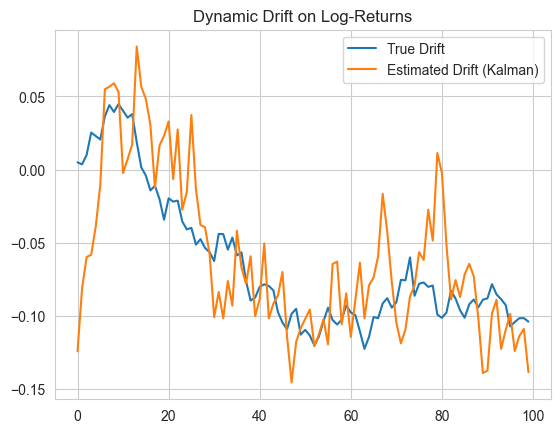

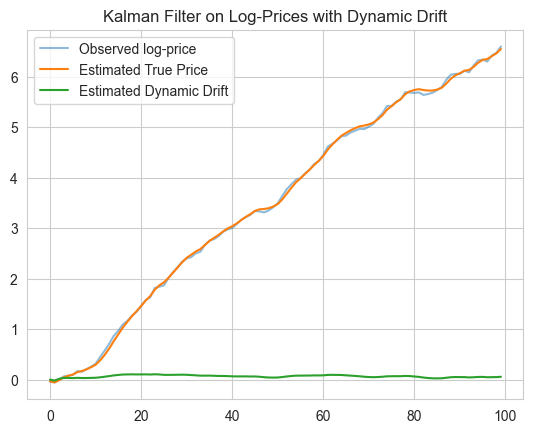

In [17]:
from pykalman import KalmanFilter
# Decode the Base64 to get the original Python code
import base64
code = base64.b64decode('ZnJvbSBweWthbG1hbiBpbXBvcnQgS2FsbWFuRmlsdGVyCmltcG9ydCBudW1weSBhcyBucAppbXBvcnQgbWF0cGxvdGxpYi5weXBsb3QgYXMgcGx0CgpucC5yYW5kb20uc2VlZCg0MikKbiA9IDEwMAp0cnVlX211ID0gbnAuY3Vtc3VtKG5wLnJhbmRvbS5ub3JtYWwoMCwgMC4wMSwgbikpCnJldHVybnMgPSB0cnVlX211ICsgbnAucmFuZG9tLm5vcm1hbCgwLCAwLjEsIG4pCgprZiA9IEthbG1hbkZpbHRlcigKICAgIHRyYW5zaXRpb25fbWF0cmljZXM9WzFdLAogICAgb2JzZXJ2YXRpb25fbWF0cmljZXM9WzFdLAogICAgdHJhbnNpdGlvbl9jb3ZhcmlhbmNlPTAuMDEsCiAgICBvYnNlcnZhdGlvbl9jb3ZhcmlhbmNlPTAuMSwKICAgIGluaXRpYWxfc3RhdGVfbWVhbj0wLAogICAgaW5pdGlhbF9zdGF0ZV9jb3ZhcmlhbmNlPTEKKQoKbXVfZXN0LCBfID0ga2YuZmlsdGVyKHJldHVybnMpCgpwbHQucGxvdCh0cnVlX211LCBsYWJlbD0nVHJ1ZSBEcmlmdCcpCnBsdC5wbG90KG11X2VzdCwgbGFiZWw9J0VzdGltYXRlZCBEcmlmdCAoS2FsbWFuKScpCnBsdC5sZWdlbmQoKTsgcGx0LnRpdGxlKCJEeW5hbWljIERyaWZ0IG9uIExvZy1SZXR1cm5zIikKcGx0LnNob3coKQo=').decode('utf-8')

# Execute the Python code string
exec(code)

transition_matrix = [[1, 1], [0, 1]]
observation_matrix = [[1, 0]]
transition_covariance = np.diag([0.01, 0.001])
observation_covariance = 0.1

kf = KalmanFilter(
    transition_matrices=transition_matrix,
    observation_matrices=observation_matrix,
    transition_covariance=transition_covariance,
    observation_covariance=observation_covariance,
    initial_state_mean=[0, 0],
    initial_state_covariance=np.eye(2)
)

# Simulate noisy log-prices from dynamic drift
n = 100
mu = np.cumsum(np.random.normal(0, 0.01, n))
price = np.cumsum(mu + np.random.normal(0, 0.05, n))

state_means, _ = kf.filter(price)

plt.plot(price, label='Observed log-price', alpha=0.5)
plt.plot(state_means[:, 0], label='Estimated True Price')
plt.plot(state_means[:, 1], label='Estimated Dynamic Drift')
plt.legend(); plt.title("Kalman Filter on Log-Prices with Dynamic Drift")
plt.show()


In [18]:
from statsmodels.tsa.vector_ar.vecm import VECM
from statsmodels.tsa.vector_ar.vecm import select_order, select_coint_rank

lag_order = select_order(df, maxlags=10, deterministic='ci').aic

rank = select_coint_rank(df, det_order=0, k_ar_diff=lag_order).rank
vecm = VECM(df, k_ar_diff=lag_order, coint_rank=rank, deterministic='ci')
vecm_fit = vecm.fit()

NameError: name 'df' is not defined

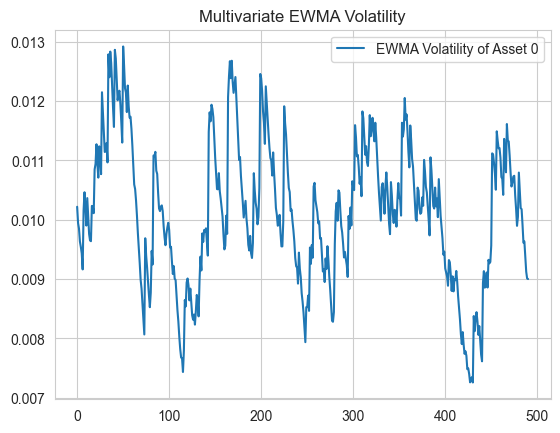

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate multivariate returns: 3 assets
np.random.seed(44)
n_assets = 3
n_obs = 500
returns = np.random.normal(0, 0.01, (n_obs, n_assets))

# Initialize
lambda_ = 0.94
Sigma_ewma = np.cov(returns[:10].T)  # initial estimate
cov_series = [Sigma_ewma.copy()]

# Recursive MEWMA update
for r in returns[10:]:
    r = r.reshape(-1, 1)  # column vector
    Sigma_ewma = lambda_ * Sigma_ewma + (1 - lambda_) * (r @ r.T)
    cov_series.append(Sigma_ewma.copy())

# Extract vol of asset 0 over time
vol_asset0 = [np.sqrt(cov[0, 0]) for cov in cov_series]
plt.plot(vol_asset0, label="EWMA Volatility of Asset 0")
plt.title("Multivariate EWMA Volatility")
plt.legend(); plt.show()
